In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df = pd.read_csv('D:\\Datasets\\Cluster_Segmentation.csv')

In [48]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [49]:
df.shape

(850, 10)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
Customer Id        850 non-null int64
Age                850 non-null int64
Edu                850 non-null int64
Years Employed     850 non-null int64
Income             850 non-null int64
Card Debt          850 non-null float64
Other Debt         850 non-null float64
Defaulted          700 non-null float64
Address            850 non-null object
DebtIncomeRatio    850 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [51]:
df['Address'].nunique()

32

In [52]:
dummy = pd.get_dummies(df['Address'], prefix='Add', drop_first=True)

In [53]:
dummy.head()

,Add_NBA001,Add_NBA002,Add_NBA003,Add_NBA004,Add_NBA005,Add_NBA006,Add_NBA007,Add_NBA008,Add_NBA009,Add_NBA010,...,Add_NBA022,Add_NBA023,Add_NBA024,Add_NBA025,Add_NBA026,Add_NBA027,Add_NBA029,Add_NBA030,Add_NBA031,Add_NBA034
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df.drop(labels='Address', axis=1, inplace= True)

In [55]:
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

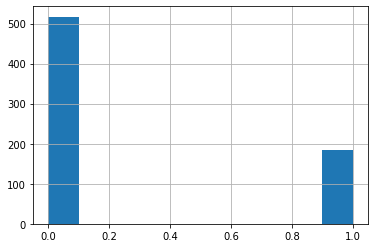

In [56]:
df['Defaulted'].hist()

In [57]:
df['Defaulted'].nunique()

2

In [58]:
df['Defaulted'].unique()

array([ 0.,  1., nan])

In [59]:
df['Defaulted'].fillna(method='pad', inplace=True)

In [60]:
df.isnull().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [61]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.257647,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.437596,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
ss = StandardScaler()

In [46]:
df_ss = ss.fit_transform(df)

In [64]:
df_ss

array([[-1.7300143 ,  0.74291541,  0.31212243, ..., -0.59048916,
        -0.5891249 , -0.57652509],
       [-1.72593888,  1.48949049, -0.76634938, ...,  1.51296181,
        -0.5891249 ,  0.39138677],
       [-1.72186347, -0.25251804,  0.31212243, ...,  0.80170393,
         1.69743293,  1.59755385],
       ...,
       [ 1.72186347, -1.24795149,  2.46906604, ...,  0.03863257,
         1.69743293,  3.45892281],
       [ 1.72593888, -0.37694723, -0.76634938, ..., -0.70147601,
        -0.5891249 , -1.08281745],
       [ 1.7300143 ,  2.1116364 , -0.76634938, ...,  0.16463355,
        -0.5891249 , -0.2340332 ]])

In [67]:
from sklearn.cluster import KMeans

In [89]:
cluster = [i for i in range(1,15)]
intertia = []
for k in cluster:
    km = KMeans(n_clusters=k, init='k-means++',)
    km.fit(df_ss) 
    intertia.append(km.inertia_)
    
intertia


[7650.0,
 6041.887977440574,
 5231.057795784953,
 4666.63620445434,
 4315.223054066372,
 3994.8550535237273,
 3714.738065401802,
 3514.784688809695,
 3345.689193672497,
 3208.889222958019,
 3094.896856708185,
 2994.982366779368,
 2896.7272946385074,
 2812.555130290624]

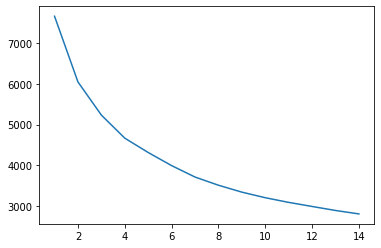

In [90]:
plt.plot(np.array(cluster), np.array(intertia),)

In [94]:
km = KMeans(n_clusters=4, init='k-means++',)
km.fit(df_ss) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [135]:
lables = km.labels_

In [96]:
km.cluster_centers_

array([[ 0.15632133,  1.00362417,  0.54322353,  1.29781461,  2.30220628,
         3.021527  ,  2.88482765,  0.60859587,  1.3362531 ],
       [ 0.0040644 , -0.48388906,  0.08476891, -0.66765706, -0.41156589,
        -0.034631  , -0.14065388,  1.67271338,  0.46117301],
       [-0.18946931,  0.89601491, -0.05565137,  1.07229449,  0.65695811,
         0.15110962,  0.32875527, -0.44160504, -0.08395711],
       [ 0.0832449 , -0.36223639, -0.06507707, -0.40315163, -0.40175587,
        -0.37755711, -0.41005342, -0.5891249 , -0.30349986]])

In [136]:
df['Class'] = lables

In [137]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Class
0,1,41,2,6,19,0.124,1.073,0.0,6.3,3
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,3
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [138]:
df.groupby(by='Class').sum()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Class,,,,,,,,,
0,19482,1810,93,729,5685,335.846,540.874,22.0,804.1
1,78902,5761,331,748,5702,278.100,481.185,183.0,2454.7
2,82245,9164,360,3435,15620,411.837,910.421,14.0,2084.9
3,181046,13040,670,2369,12667,314.514,684.477,0.0,3302.2


In [139]:
df.groupby(by='Class').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Class,,,,,,,,,
0,463.857143,43.095238,2.214286,17.357143,135.357143,7.996333,12.877952,0.523810,19.145238
1,426.497297,31.140541,1.789189,4.043243,30.821622,1.503243,2.601000,0.989189,13.268649
2,379.009217,42.230415,1.658986,15.829493,71.981567,1.897866,4.195488,0.064516,9.607834
3,445.926108,32.118227,1.650246,5.834975,31.199507,0.774665,1.685904,0.000000,8.133498


In [44]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
mm = MinMaxScaler()

In [120]:
df_mm = mm.fit_transform(df)

In [121]:
df_mm

array([[0.        , 0.58333333, 0.25      , ..., 0.02921681, 0.        ,
        0.15048544],
       [0.00117786, 0.75      , 0.        , ..., 0.23248272, 0.        ,
        0.30825243],
       [0.00235571, 0.36111111, 0.25      , ..., 0.16375068, 1.        ,
        0.50485437],
       ...,
       [0.99764429, 0.13888889, 0.75      , ..., 0.09001166, 1.        ,
        0.80825243],
       [0.99882214, 0.33333333, 0.        , ..., 0.01849165, 0.        ,
        0.06796117],
       [1.        , 0.88888889, 0.        , ..., 0.1021877 , 0.        ,
        0.20631068]])

In [122]:
from sklearn.decomposition import PCA

In [123]:
df_mm = PCA(n_components=2).fit_transform(df_mm)

In [124]:
km_mm = KMeans(n_clusters=4, init='k-means++',)
km_mm.fit(df_mm) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [128]:
lables = km_mm.labels_

In [129]:
np.unique(lables)

array([0, 1, 2, 3])

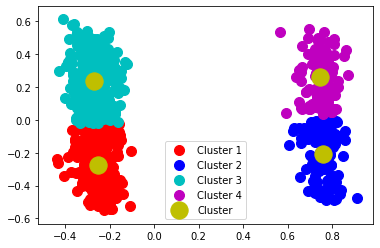

In [134]:
plt.scatter(df_mm[lables==0 , 0], df_mm[lables==0 , 1], color = 'r', label='Cluster 1', s = 100)
plt.scatter(df_mm[lables==1 , 0], df_mm[lables==1 , 1], color = 'B', label='Cluster 2', s = 100)
plt.scatter(df_mm[lables==2 , 0], df_mm[lables==2 , 1], color = 'c', label='Cluster 3', s = 100)
plt.scatter(df_mm[lables==3 , 0], df_mm[lables==3 , 1], color = 'M', label='Cluster 4', s = 100)
plt.scatter(km_mm.cluster_centers_[:, 0], km_mm.cluster_centers_[:, 1], color = 'y', label = 'Cluster', s = 300)
plt.legend()

In [131]:
km_mm.cluster_centers_

array([[-0.25301765, -0.27387651],
       [ 0.759415  , -0.21007702],
       [-0.26914888,  0.2347826 ],
       [ 0.74724233,  0.26004087]])